# Testing the effect of satellites on mass determination

How about just the mean (bias if non zero) and dispersion for M100? So you would want to study the distribution of M100_without - M100_with. Is the mean zero? And what is the width of the distirbution?

In [40]:
import sys
sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *

import numpy as np
import h5py
import pickle
import matplotlib.pyplot as plt
from matplotlib import rcParams
import glob
import random

from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d

from astropy.table import Table

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
def display_maps(cen_sat_map, cen_map, pixel_scale):
    """
    Show the images of Illustris simulated galaxy.
    """
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(hspace=0.0, wspace=0.0,
                        top=1.0, right=1.0,
                        left=0.0, bottom=0.0)

    ax1 = plt.subplot(1, 3, 1)
    ax1 = display_single(cen_sat_map, ax=ax1,
                         contrast=0.15,
                         scale_bar_length=20.0,
                         scale_bar_loc='right',
                         stretch='log10',
                         pixel_scale=1.0,
                         physical_scale=pixel_scale,
                         color_bar=True)

    ax2 = plt.subplot(1, 3, 2)
    ax2 = display_single(cen_map, ax=ax2,
                         contrast=0.10,
                         scale_bar_length=20.0,
                         scale_bar_loc='right',
                         stretch='log10',
                         pixel_scale=1.0,
                         physical_scale=pixel_scale,
                         color_bar=True)

    ax3 = plt.subplot(1, 3, 3)
    ax3 = display_single(cen_sat_map - cen_map, ax=ax3,
                         contrast=0.12,
                         scale_bar_length=20.0,
                         scale_bar_loc='right',
                         stretch='log10',
                         pixel_scale=1.0,
                         physical_scale=pixel_scale,
                         color_bar=True)



# Get profiles for galaxies

## pick 5 randoms

In [4]:
#pick 5 random
np.random.seed(92)
random_indices_tng = np.random.randint(0, 235, size=5)
print random_indices_tng

# random_isos_tng = [tng_isos[i] for i in random_indices_tng]
# random_masses_tng = [tng_masses[i] for i in random_indices_tng]

[122  42  67  18 139]


In [25]:
resolution ='quick'
pixel_scale_quick = 5.33333

quick_profiles_tng_with_sats = [get_iso(TNG_file_quick,'TNG', resolution, intMode='mean', components='cen+sat', gal_n=i) for i in random_indices_tng]

quick_profiles_tng_without_sats = [get_iso(TNG_file_quick,'TNG', resolution, intMode='mean', components='cen', gal_n=i) for i in random_indices_tng]


^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^TNG GALAXY 122^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/quick/TNG_122_xy_cen+sat.fits
###      Input Image   : temp_WYUO8.fits
###      Output Binary : /

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
###     Input background value   :  0.0
###     1-D SBP background value :  2895.543
###     Current outer background :  2895.543
----------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^TNG GALAXY 42^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------


In [32]:
resolution = 'highres'
pixel_scale_highres = 1.

highres_profiles_tng_with_sats = [get_iso(TNG_file_highres,'TNG', resolution, intMode='mean', components='cen+sat', gal_n=i) for i in random_indices_tng]

highres_profiles_tng_without_sats = [get_iso(TNG_file_highres,'TNG', resolution, intMode='mean', components='cen', gal_n=i) for i in random_indices_tng]



^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^TNG GALAXY 122^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
##       Start the Ellipse Run: Attempt  1
----------------------------------------------------------------------------------------------------
###      Origin Image  : /Users/fardila/Documents/GitHub/HSC_vs_hydro/Figures/fits_files/highres/TNG_122_xy_cen+sat.fits
###      Input Image   : temp_7NZ0J.fits
###      Output Binary :

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
###     Input background value   :  0.0
###     1-D SBP background value :  146243.65
###     Current outer background :  146243.65
----------------------------------------------------------------------------------------------------
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
^^^^^TNG GALAXY 42^^^^^^
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
----------------------------------------------------------------------------------------------------
###      galX, galY :  150.0 150.0
###      galR :  20.0
###      iniSma, maxSma :  50.0 250
###      Stage :  3
###      Step :  0.05
----------------------------------------------------------------------------------------------------
##       Set up the Ellipse configuration
---------------------------------------------------------------------------------------------------

## plot profiles

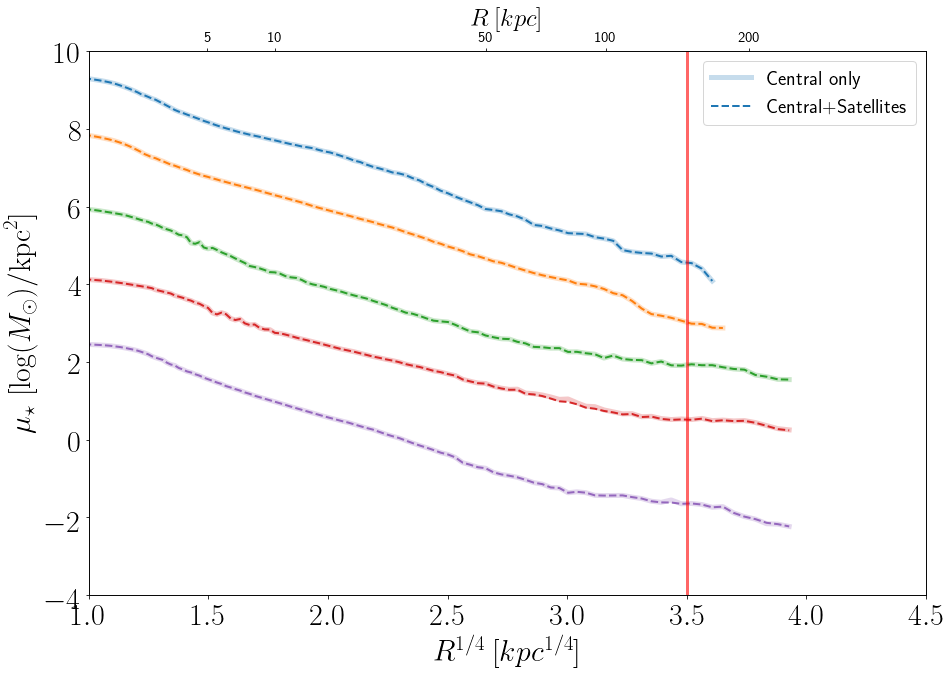

In [40]:
#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

pixel_scale = pixel_scale_highres

######################################################################################################################
# plot
######################################################################################################################

for i in range(len(profiles_tng_with_sats)): 
    
        profile_with_sats= highres_profiles_tng_with_sats[i]
        profile_without_sats= highres_profiles_tng_without_sats[i]


        mu_with_sats_plot = ax1.plot((profile_with_sats['sma_kpc']) ** 0.25,
                           np.log10(mu_iso(profile_with_sats, pixel_scale))-i*1.75, 
                           linewidth=5, alpha=0.25, label='Central+Satellites', zorder=1)
        
        mu_without_sats_plot = ax1.plot((profile_without_sats['sma_kpc']) ** 0.25,
                           np.log10(mu_iso(profile_without_sats, pixel_scale))-i*1.75, 
                           linewidth=2, alpha=1, label='Central only', zorder=1, 
                           c=mu_with_sats_plot[0].get_color(), linestyle='--')



# ######################################################################################################################
# # plot details
# ######################################################################################################################
# # X-Y limits
ax1.set_xlim(1**0.25, 4.5)
ax1.set_ylim(-4, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[:2], labels[:2], fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25])
ax1_twin.xaxis.set_ticklabels([5, 10, 50, 100, 200])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
#ax1.set_title('5 randomly selected profiles and extrapolations', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(150.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

# ax1.axvline(initial_r ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='b')
# ax1.axvline(final_r ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='b')
# ax1.axvspan(initial_r** 0.25, final_r** 0.25, alpha=0.2, color='b')

######################################################################################################################
#adjustments to ticks and space between subplots

fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/masking_satellites_highres.pdf',
            dpi=100, format='pdf', bbox_inches='tight')

plt.show()

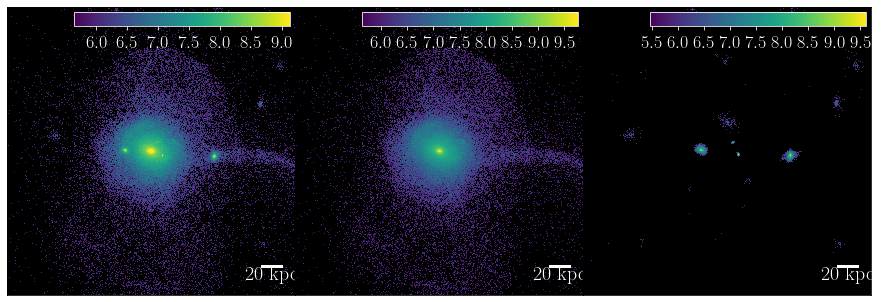

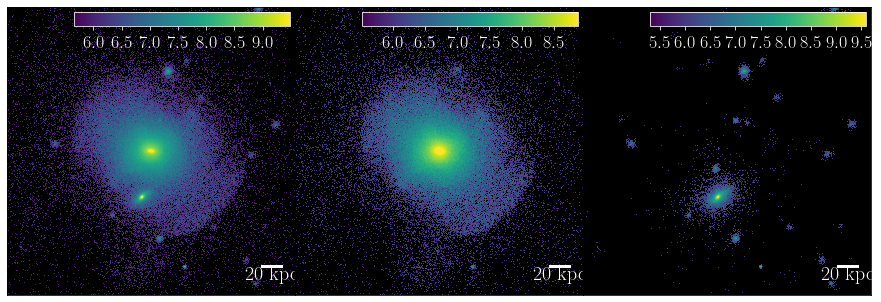

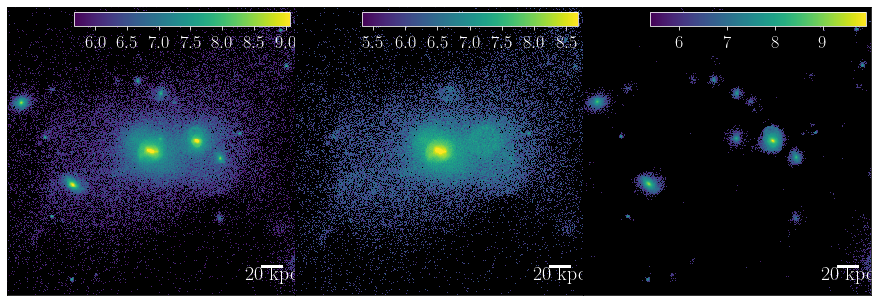

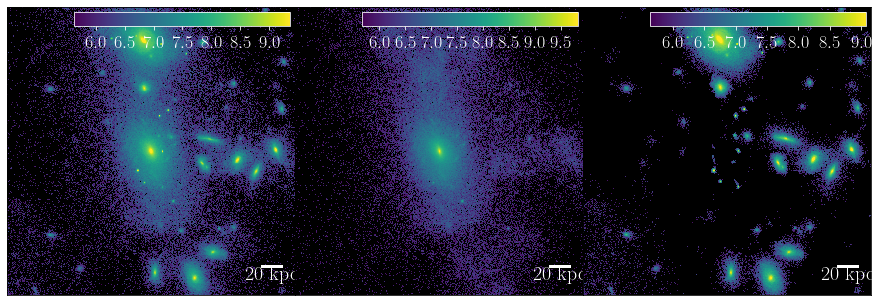

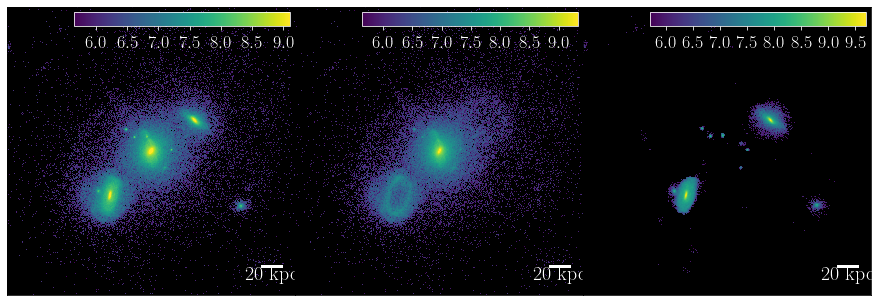

In [34]:
mass_maps = [get_mass_maps(TNG_file_highres, gal_n=i)[:2] for i in random_indices_tng]

for galaxy in mass_maps:
    display_maps(galaxy[0], galaxy[1], pixel_scale_highres)

/Users/fardila/anaconda2/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10
/Users/fardila/anaconda2/envs/hsc_hydro/lib/python2.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


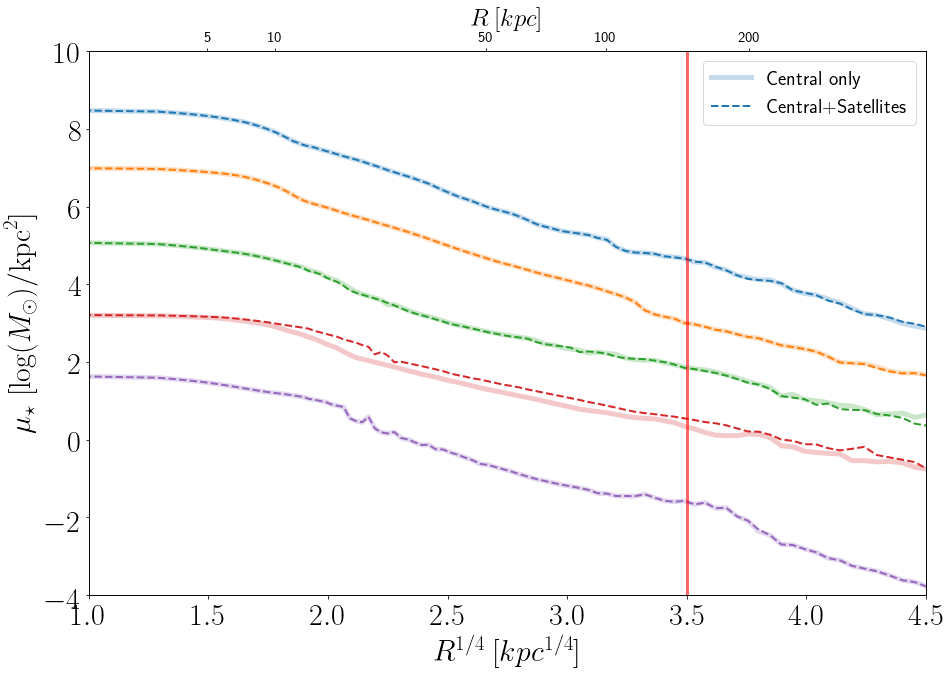

In [41]:
#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

pixel_scale = pixel_scale_quick

######################################################################################################################
# plot
######################################################################################################################

for i in range(len(profiles_tng_with_sats)): 
    
        profile_with_sats= quick_profiles_tng_with_sats[i]
        profile_without_sats= quick_profiles_tng_without_sats[i]


        mu_with_sats_plot = ax1.plot((profile_with_sats['sma_kpc']) ** 0.25,
                           np.log10(mu_iso(profile_with_sats, pixel_scale))-i*1.75, 
                           linewidth=5, alpha=0.25, label='Central+Satellites', zorder=1)
        
        mu_without_sats_plot = ax1.plot((profile_without_sats['sma_kpc']) ** 0.25,
                           np.log10(mu_iso(profile_without_sats, pixel_scale))-i*1.75, 
                           linewidth=2, alpha=1, label='Central only', zorder=1, 
                           c=mu_with_sats_plot[0].get_color(), linestyle='--')



# ######################################################################################################################
# # plot details
# ######################################################################################################################
# # X-Y limits
ax1.set_xlim(1**0.25, 4.5)
ax1.set_ylim(-4, 10)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[:2], labels[:2], fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25])
ax1_twin.xaxis.set_ticklabels([5, 10, 50, 100, 200])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
#ax1.set_title('5 randomly selected profiles and extrapolations', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(150.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

# ax1.axvline(initial_r ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='b')
# ax1.axvline(final_r ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='b')
# ax1.axvspan(initial_r** 0.25, final_r** 0.25, alpha=0.2, color='b')

######################################################################################################################
#adjustments to ticks and space between subplots

fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/masking_satellites_quick.pdf',
            dpi=100, format='pdf', bbox_inches='tight')

plt.show()

In [16]:
def display_maps(img_cen, img_cen_sat, pixel_scale):
    """
    Show the images of Illustris simulated galaxy.
    """
    fig = plt.figure(figsize=(12, 6))
    fig.subplots_adjust(hspace=0.0, wspace=0.0,
                        top=1.0, right=1.0,
                        left=0.0, bottom=0.0)

        
    ax1 = plt.subplot(1, 3, 1)
    ax1 = display_single(img_cen_sat, ax=ax1,
                         contrast=0.15,
                         scale_bar_length=20.0,
                         scale_bar_loc='right',
                         stretch='log10',
                         pixel_scale=1.0,
                         physical_scale=pixel_scale,
                         color_bar=True)

    ax2 = plt.subplot(1, 3, 2)
    ax2 = display_single(img_cen, ax=ax2,
                         contrast=0.10,
                         scale_bar_length=20.0,
                         scale_bar_loc='right',
                         stretch='log10',
                         pixel_scale=1.0,
                         physical_scale=pixel_scale,
                         color_bar=True)
    
    ax3 = plt.subplot(1, 3, 3)
    ax3 = display_single(img_cen_sat - img_cen, ax=ax3,
                         contrast=0.10,
                         scale_bar_length=20.0,
                         scale_bar_loc='right',
                         stretch='log10',
                         pixel_scale=1.0,
                         physical_scale=pixel_scale,
                         color_bar=True)



    plt.show()

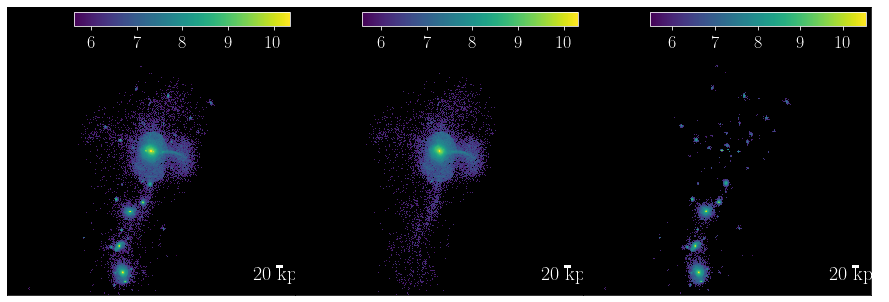

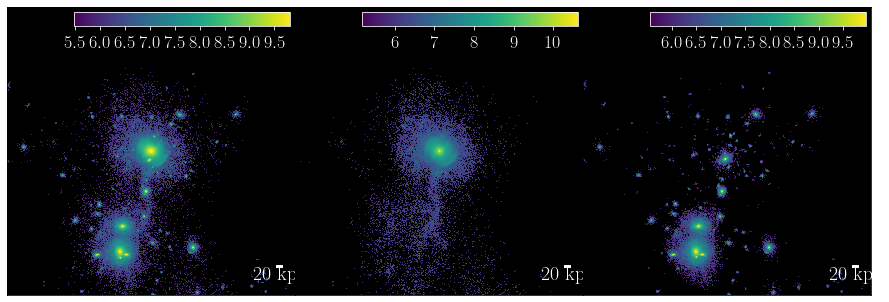

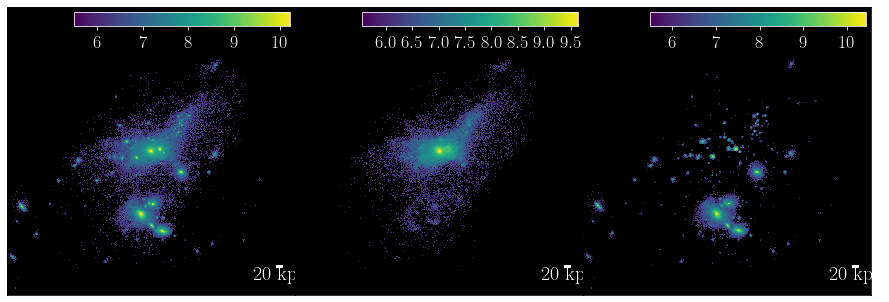

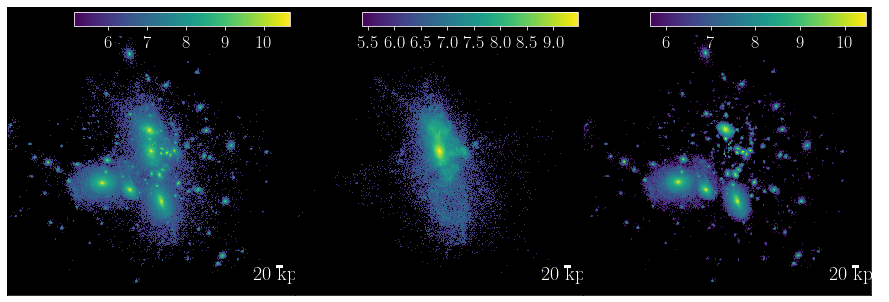

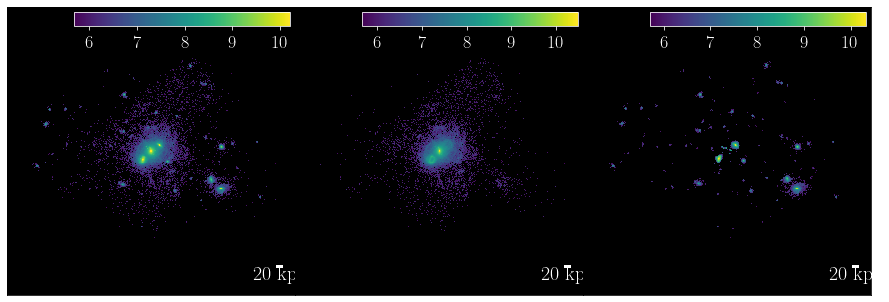

In [28]:
mass_maps = [get_mass_maps(TNG_file_quick, stars= 'all', gal_n=i)[:2] for i in random_indices_tng]

for galaxy in mass_maps:
    display_maps(galaxy[0], galaxy[1], pixel_scale_quick)

# Check Mass differences

In [59]:
#load files
cen_mass_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_masses_highres.pkl'
censat_mass_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_masses_cen+sats_highres.pkl'

cen_masses = load_pkl(cen_mass_file)
censat_masses = load_pkl(censat_mass_file)

In [60]:
censat_masses

m_1d_10,m_1d_30,m_1d_100,m_1d_500,m_1d_800,m_2d_10,m_2d_30,m_2d_100,m_2d_500,m_2d_800,extrapolated_m_300,extrapolated_m_500,extrapolated_m_800,m_cat,m_post,m_post_icl
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
11.763712555889336,12.095991790303671,12.290385118062842,12.372257889260744,12.372257889260744,11.689330688579492,11.99153696056057,12.2111237830975,12.315170333767131,12.315170333767131,12.404791416503361,12.439115411003367,12.464204696358395,12.414851125832998,12.315170334345334,12.315183573995103
11.677089446135433,11.9017765209349,12.050771783702052,12.16192419449562,12.16192419449562,11.697567485746717,11.85458490151112,11.99200894631703,12.091726474497978,12.091726474497978,12.206761782911403,12.260554078474298,12.303216598232446,12.222039953054319,12.091726474088459,12.0918201113958
11.630525361365677,11.917419454016558,12.135800099953855,12.270303378919728,12.270303378919728,11.589503298456131,11.856645985974806,12.068993092254908,12.202028647665772,12.202028647665772,12.337237462000889,12.400505340570424,12.448833173985804,12.33545120600355,12.202028648035323,12.202304179002104
11.642219874467184,11.926682964760287,12.116017971494031,12.180142435383747,12.180142435383747,11.67237342570461,11.956726816208977,12.151820196706897,12.218869785970378,12.218869785970378,12.256010317554734,12.306691646239617,12.347784157707583,12.306992548357814,12.218869785624925,12.219199072065303
11.616817076978133,11.756469495618873,11.887646397849403,11.979603298799985,11.979603298799985,11.53301853765647,11.72264354249585,11.877138438406918,11.958238386421053,11.958238386421053,12.051111111217637,12.120134772232491,12.18075085813285,12.034769685894226,11.958238386782098,11.958348249606784
11.560042489446754,11.808532131454038,11.937694528405876,12.028006807212892,12.028006807212892,11.540354829960618,11.729794150309157,11.885201317983629,11.961140076284106,11.961140076284106,12.053103449141375,12.096621301636036,12.132526454196046,12.036076475095859,11.961140076215777,11.961208933903826
11.62033459838398,11.885875849084261,12.050246754923887,12.110826341211308,12.110826341211308,11.52291694023317,11.79142078989781,12.128549841477815,12.218610093813295,12.218610093813295,12.165582850398435,12.205085334557058,12.236066702442987,12.258741664986344,12.218610094018368,12.219187232929297
11.263977879456775,11.588643031814087,11.821334423571265,11.974121028456828,11.974121028456828,11.411352605343287,11.63947422258015,11.820214477993021,11.9597718363966,11.961878719466823,12.081071751910764,12.153950302226121,12.207385075940149,12.064481934791557,11.961878718969844,11.961969380570984
11.491941136833791,11.786472310497617,12.026077516918589,12.134416772656783,12.134416772656783,11.574486663985498,11.842361369017917,12.031023390373775,12.117485924825427,12.117485924825427,12.218855625145535,12.286615316076045,12.341217514723835,12.175000477057637,12.117485924521796,12.117506603624722


In [61]:
cen_masses

m_1d_10,m_1d_30,m_1d_100,m_1d_500,m_1d_800,m_2d_10,m_2d_30,m_2d_100,m_2d_500,m_2d_800,extrapolated_m_300,extrapolated_m_500,extrapolated_m_800,m_cat,m_post,m_post_icl
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
11.76024172759147,12.093535699995554,12.289991662656853,12.380527665748408,12.380527665748408,11.77350757938413,12.101761879109436,12.303738186458856,12.377627652942456,12.377627652942456,12.409390191068832,12.445570328574874,12.472189976011201,12.449948294587058,12.377627652227904,12.377636378979057
11.685584732368032,11.914412991860594,12.081430907818302,12.184094823470208,12.184094823470208,11.600464246910624,11.834419539513668,12.028111205876552,12.143518476611714,12.143845339554813,12.294421358670627,12.365526904931961,12.421612486341818,12.259177003890787,12.143845338473067,12.143881519296086
11.630525361365677,11.917419454016558,12.135800099953855,12.270300817978029,12.270300817978029,11.602104893644077,11.88467074348886,12.124250634908982,12.21780332503822,12.21780332503822,12.337237462000889,12.400505340570424,12.448833173985804,12.298563421762477,12.21780332528156,12.217812324369548
11.642219874467184,11.92667205476723,12.11594800751988,12.17968466785341,12.17968466785341,11.668820558224406,11.945463771705757,12.131575021365759,12.188597874455331,12.188597874455331,12.25571473387309,12.306264890022149,12.34722898457952,12.255498587071717,12.188597873640752,12.189504379913165
11.616817076978133,11.756469495618873,11.887646397849403,11.979601748225896,11.979601748225896,11.592813657885678,11.730529670123053,11.87707616834326,11.945589397794787,11.945589397794787,12.051111111217637,12.120134772232491,12.18075085813285,12.004197258360241,11.945589396124456,11.945590806024605
11.560042489446754,11.808532131454038,11.937693450314429,12.027998511840597,12.027998511840597,11.565031978642756,11.80259696205706,11.937888071442154,11.992568308301532,11.992568308301532,12.053093667667742,12.096606137118526,12.132505893910796,12.056644643447035,11.992568307990515,11.992575189352728
11.62033459838398,11.885875359241425,12.05024553977323,12.110812756853926,12.110812756853926,11.64620778448574,11.904115088118312,12.063284190009938,12.111829687880116,12.111829687880116,12.165576524706514,12.20507602345258,12.236054507475975,12.157050380071757,12.111829687517918,12.111842506515172
11.263975676407101,11.588640226472625,11.821291354317594,11.974005561025857,11.974005561025857,11.180770123766301,11.479050605409343,11.736153042791228,11.94342465081833,11.94557966126285,12.081039633123204,12.15393750383621,12.207392281817235,12.06433357729923,11.9455796614794,11.946043532694056
11.491941136833791,11.786472310497617,12.026077516918589,12.134416772656783,12.134416772656783,11.490813826908386,11.789213948642152,12.043666038961826,12.121279896284465,12.121279896284465,12.218855625145535,12.286615316076045,12.341217514723835,12.193893272772968,12.12127989608549,12.121280721288795


In [62]:
M10_differences = 10**censat_masses['m_1d_10'] - 10**cen_masses['m_1d_10']
M30_differences = 10**censat_masses['m_1d_30'] - 10**cen_masses['m_1d_30']
M100_differences = 10**censat_masses['m_1d_100'] - 10**cen_masses['m_1d_100']

In [63]:
M10_differences

4619841925.781372
-9391559583.351257
0.0
0.0
0.0
0.0
0.0
931572.7069396973
0.0
1758569.421508789
0.0


In [64]:
print('mean ; median ; std')
print('M10 differences: {0}; {1}; {2}'.format(round(np.mean(M10_differences),3),
                                              round(np.median(M10_differences),3),
                                              round(np.std(M10_differences),3)))
      
print('M30 differences: {0}; {1}; {2}'.format(round(np.mean(M30_differences),3),
                                              round(np.median(M30_differences),3),
                                              round(np.std(M30_differences),3)))
      
print('M100 differences: {0}; {1}; {2}'.format(round(np.mean(M100_differences),3),
                                              round(np.median(M100_differences),3),
                                              round(np.std(M100_differences),3)))
      

mean ; median ; std
M10 differences: -18813707.539; 0.0; 682641650.634
M30 differences: -63626090.22; 0.0; 1603013732.19
M100 differences: -297764351.271; 1135874.696; 5362541814.05


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0., 230.,   4.]),
 array([-8.22180093e+10, -8.05219981e+10, -7.88259868e+10, -7.71299756e+10,
        -7.54339644e+10, -7.37379532e+10, -7.20419420e+10, -7.03459307e+10,
        -6.86499195e+10, -6.69539083e+10, -6.52578971e+10, -6.35618859e+10,
        -6.18658747e+10, -6.01698634e+10, -5.84738522e+10, -5.67778410e+10,
        -5.50818298e+10, -5.33858186e+10, -5.16898073e+10, -4.99937961e+10,
        -4.82977849e+10, -4.66017737e+10, -4.49057625e+10, -4.32097512e+10,
        -4.15137400e+10, -3.98177288e+10, -3.81217176e+10, -3.64257064e+10,
        -3.47296951e+10, -3.30336839e+10, -3.13376727e+10, -2.96416615e+10,
        -2.79456503e+10, -2.62496391e+10, -2.45536

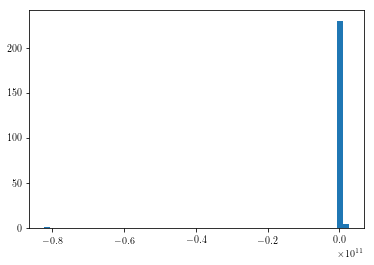

In [36]:
plt.hist(M100_differences, bins=50)

In [65]:
M10_differences<-100

array([False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

/Users/fardila/Documents/Github/kungpao/kungpao/display.py:153: RuntimeWarning: divide by zero encountered in log10
  img_scale = np.log10(img)
/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


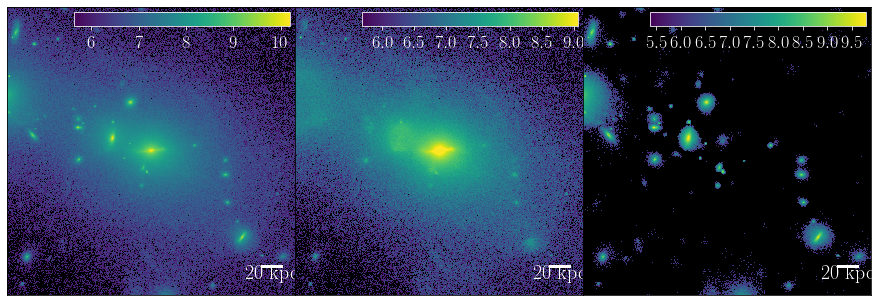

In [44]:
pixel_scale_highres = 1

mass_maps = [get_mass_maps(TNG_file_highres, gal_n=i)[:2] for i in [1]]

for galaxy in mass_maps:
    display_maps(galaxy[1], galaxy[0], pixel_scale_highres)

In [54]:
#load files
cen_profile_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_highres.pkl'
censat_profile_file = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos_cen+sats_highres.pkl'

cen_isos = load_pkl(cen_profile_file)
censat_isos = load_pkl(censat_profile_file)

In [99]:
pixel_scale_highres

1

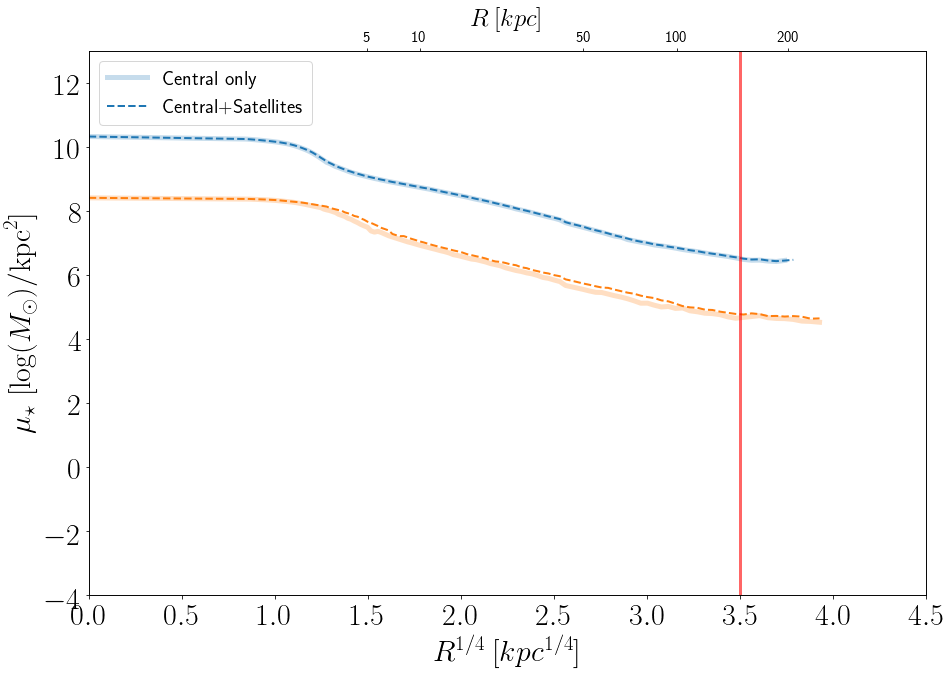

In [57]:
#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

pixel_scale = pixel_scale_highres

######################################################################################################################
# plot
######################################################################################################################

for i in range(len(censat_isos[:2])): 
    
        profile_with_sats= censat_isos[i]
        profile_without_sats= cen_isos[i]


        mu_with_sats_plot = ax1.plot((profile_with_sats['sma_kpc']) ** 0.25,
                           np.log10(mu_iso(profile_with_sats, pixel_scale))-i*1.75, 
                           linewidth=5, alpha=0.25, label='Central only', zorder=1)
        
        mu_without_sats_plot = ax1.plot((profile_without_sats['sma_kpc']) ** 0.25,
                           np.log10(mu_iso(profile_without_sats, pixel_scale))-i*1.75, 
                           linewidth=2, alpha=1, label='Central+Satellites', zorder=1, 
                           c=mu_with_sats_plot[0].get_color(), linestyle='--')



# ######################################################################################################################
# # plot details
# ######################################################################################################################
# # X-Y limits
ax1.set_xlim(0**0.25, 4.5)
ax1.set_ylim(-4, 13)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[:2], labels[:2], fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25])
ax1_twin.xaxis.set_ticklabels([5, 10, 50, 100, 200])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
#ax1.set_title('5 randomly selected profiles and extrapolations', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(150.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

# ax1.axvline(initial_r ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='b')
# ax1.axvline(final_r ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='b')
# ax1.axvspan(initial_r** 0.25, final_r** 0.25, alpha=0.2, color='b')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/masking_satellites_quick.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

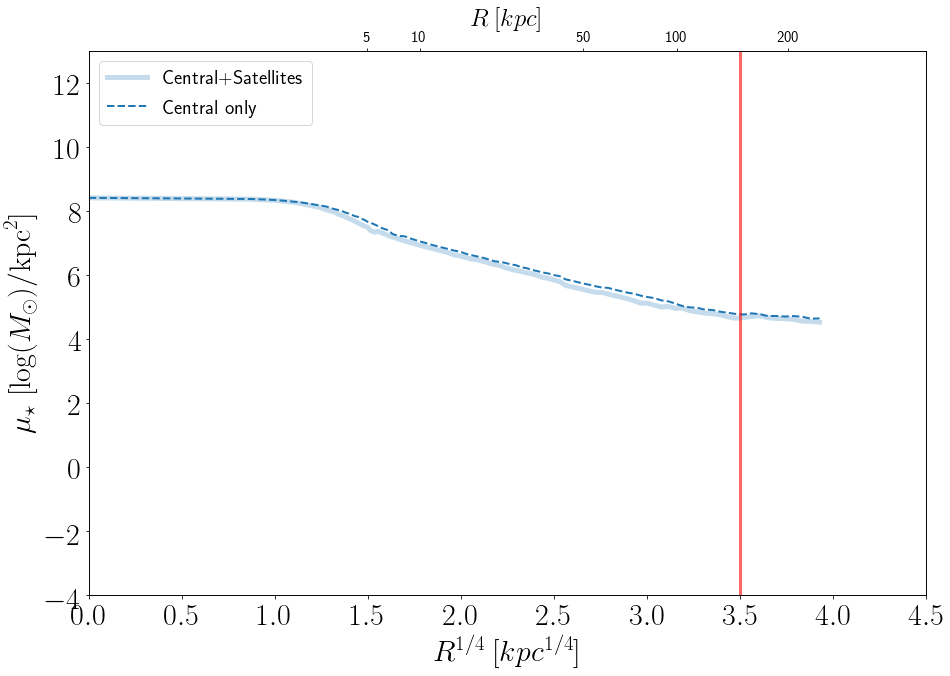

In [115]:
#plot
fig =plt.figure(figsize=(15, 10))
ax1 = plt.subplot()

pixel_scale = pixel_scale_highres

######################################################################################################################
# plot
######################################################################################################################



profile_with_sats= censat_isos[1]
profile_without_sats= cen_isos[1]


mu_with_sats_plot = ax1.plot((profile_with_sats['sma_kpc']) ** 0.25,
                   np.log10(mu_iso(profile_with_sats, pixel_scale))-i*1.75, 
                   linewidth=5, alpha=0.25, label='Central+Satellites', zorder=1)

mu_without_sats_plot = ax1.plot((profile_without_sats['sma_kpc']) ** 0.25,
                   np.log10(mu_iso(profile_without_sats, pixel_scale))-i*1.75, 
                   linewidth=2, alpha=1, label='Central only', zorder=1, 
                   c=mu_with_sats_plot[0].get_color(), linestyle='--')



# ######################################################################################################################
# # plot details
# ######################################################################################################################
# # X-Y limits
ax1.set_xlim(0**0.25, 4.5)
ax1.set_ylim(-4, 13)

# Labels
ax1.set_xlabel(r'$\log\ (M_{\star}/M_{\odot})$', 
               size=60)
ax1.set_ylabel(r'$\mathrm{d}N/\mathrm{d}\log M_{\star}\ [{\mathrm{Mpc}^{-3}}{\mathrm{dex}^{-1}}]$', 
               size=60)
ax1.tick_params(axis='both', which='major', labelsize=30)

#text label
#ax1.text(1.65, 4.2, r'$11.6<M_{100}<11.8$', size=30)

handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[:2], labels[:2], fontsize=20)

#add twin x axis in kpc
x1, x2 = ax1.get_xlim()
ax1_twin = ax1.twiny()
ax1_twin.set_xlim(x1, x2)
ax1_twin.figure.canvas.draw()
ax1_twin.xaxis.set_ticks([5**0.25, 10**0.25, 50**0.25, 100**0.25, 200**0.25])
ax1_twin.xaxis.set_ticklabels([5, 10, 50, 100, 200])
ax1_twin.tick_params(axis='both', which='major', labelsize=15)
ax1_twin.set_xlabel(r'$R \: [kpc]$', fontsize=25)

######################################################################################################################

#axis labels and vertical lines
ax1.set_xlabel(r'$R^{1/4} \: [kpc^{1/4}]$', fontsize=30)
ax1.set_ylabel(r'$\mu_{\star}\ [\log (M_{\odot})/\mathrm{kpc}^2]$', fontsize=30)
#ax1.set_title('5 randomly selected profiles and extrapolations', fontsize=30)
# ax1.axvline(100.0 ** 0.25, linestyle='--', linewidth=3.0, alpha=0.6, c='r')
# ax1.axvline(6.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')
ax1.axvline(150.0 ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='r')

# ax1.axvline(initial_r ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='b')
# ax1.axvline(final_r ** 0.25, linestyle='-', linewidth=3.0, alpha=0.6, c='b')
# ax1.axvspan(initial_r** 0.25, final_r** 0.25, alpha=0.2, color='b')

######################################################################################################################
#adjustments to ticks and space between subplots

# fig.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/masking_satellites_quick.pdf',
#             dpi=100, format='pdf', bbox_inches='tight')

plt.show()

In [66]:
oneD_mass(censat_isos[1],100)

12.050771783702052

In [67]:
oneD_mass(cen_isos[1],100)

12.081430907818302

In [95]:
r = 10
rs=np.linspace(1,10,1000)
diffs = [10**oneD_mass(censat_isos[1],r) - 10**oneD_mass(cen_isos[1],r) for r in rs]

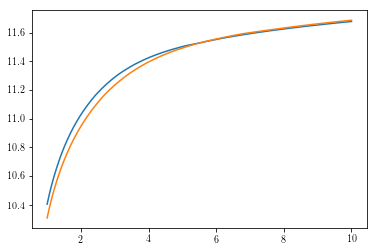

In [96]:
plt.plot(rs,oneD_mass(censat_isos[1],rs))
plt.plot(rs,oneD_mass(cen_isos[1],rs))

/Users/fardila/anaconda/envs/hsc_hydro4/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


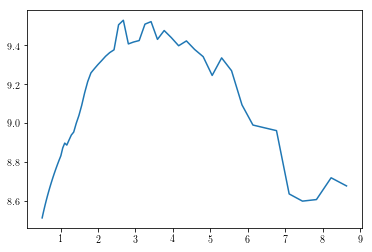

In [114]:
plt.plot(cen_isos[1]['sma'][:60], np.log10(cen_isos[1]['intens'][:60]-censat_isos[1]['intens'][:60]))

In [106]:
rmax=100

np.log10(np.sum(cen_isos[1]['intens'][:rmax])) - np.log10(np.sum(censat_isos[1]['intens'][:rmax]))

0.0392040273472265

In [104]:
np.log10(np.sum(censat_isos[1]['intens']))

11.973831505497744

In [94]:
float(cen_isos[1]['sma_kpc'][50])/float(cen_isos[1]['sma'][50])

1.0

In [72]:
10**oneD_mass(censat_isos[1],r) - 10**oneD_mass(cen_isos[1],r)

-9391559583.351257

In [69]:
10**oneD_mass(censat_isos[0],100) - 10**oneD_mass(cen_isos[0],100)

1767256593.710205

In [80]:
censat_isos[1][50:70]

sma,intens,int_err,pix_var,rms,ell,ell_err,pa,pa_err,x0,x0_err,y0,y0_err,grad,grad_err,grad_r_err,rsma,mag,mag_lerr,mag_uerr,tflux_e,tflux_c,tmag_e,tmag_c,npix_e,npix_c,a3,a3_err,b3,b3_err,a4,a4_err,b4,b4_err,ndata,nflag,niter,stop,a_big,sarea,a1,a1_err,b1,b1_err,a2,a2_err,b2,b2_err,pa_norm,sbp_ori,sbp_sub,sbp,intens_sub,intens_bkg,sbp_err,sbp_low,sbp_upp,sma_asec,rsma_asec,growth_ori,growth_sub,avg_x0,avg_y0,avg_q,avg_pa,avg_bkg,intens_cor,sbp_cor,growth_cor,rad_outer,mag_tot,mag_tot_ori,mag_tot_sub,sma_kpc,intens_kpc
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
5.564837,2525958000.0,436705344.0,2830174000.0,2001235000.0,0.58,0.1131457,-15.95,8.182499,151.0,0.4088471,150.0,0.6589204,-457690112.0,487877440.0,1.065956,1.535901,-23.50607,0.2060881,0.1731402,301078200000.0,408220100000.0,-28.6967,-29.02724,41.0,97.0,-0.2380269,0.2790501,-0.1389046,0.183021,0.03857064,0.1188886,-0.002961996,0.110987,21,1,1.0,0.0,nan,2.0,151271952.0,329110656.0,114250120.0,248370592.0,-35760788.0,285520768.0,-49970668.0,273268000.0,-15.95,-23.506065312777213,-23.506065312777213,-23.506065312777213,2525958000.0,0.0,0.1731404475886329,-23.679205760365846,-23.33292486518858,5.564837,1.53590060680891,339038800290.9918,339038800290.9918,151.0,149.99999999999997,0.42000000000000004,-15.95,5319527.0,2520638473.0,-23.50377640173546,338823263900.3559,68.01789913198995,-30.027789786941316,-30.075975289678038,-30.075975289678038,5.564837,2525958000.0
5.843079,2669214000.0,494840576.0,3356172000.0,2373172000.0,0.58,0.03621148,-15.95,2.720414,151.0,0.1359483,150.0,0.2308793,-1224762000.0,1000583000.0,0.8169611,1.554749,-23.56596,0.2226225,0.184652,303077100000.0,419826800000.0,-28.70388,-29.05768,43.0,109.0,-0.1308867,0.1114967,-0.01469827,0.0327405,0.04589202,0.04661249,0.04613135,0.04640402,23,0,1.0,0.0,nan,2.0,155488208.0,217670624.0,70248280.0,174990496.0,-44345184.0,198866896.0,-96263648.0,184093088.0,-15.95,-23.565958485137006,-23.565958485137006,-23.565958485137006,2669214000.0,0.0,0.18465142968564408,-23.75060991482265,-23.381307055451362,5.843079,1.554749549093521,350218021714.9151,350218021714.9151,151.0,149.99999999999997,0.42000000000000004,-15.95,5319527.0,2663894473.0,-23.56379254195369,349980206042.7365,68.01789913198995,-30.027789786941316,-30.075975289678038,-30.075975289678038,5.843079,2669214000.0
6.135232,2437207000.0,445885984.0,3089189000.0,2184386000.0,0.58,0.04944946,-15.95,3.693527,151.0,0.1940518,150.0,0.3306835,-807839296.0,880242496.0,1.089626,1.57383,-23.46723,0.2193788,0.1824147,312501200000.0,433490600000.0,-28.73713,-29.09245,47.0,121.0,-0.1747857,0.1956382,-0.004983794,0.04377448,0.07079579,0.0861325,0.07371303,0.08873088,24,0,1.0,0.0,nan,2.0,148813296.0,209274256.0,47981800.0,169049632.0,-47880464.0,190902640.0,-102504560.0,177784240.0,-15.95,-23.467231042022068,-23.467231042022068,-23.467231042022068,2437207000.0,0.0,0.18241558110670653,-23.649646623128774,-23.28481546091536,6.135232,1.573829739114168,361471778238.4545,361471778238.4545,151.0,149.99999999999997,0.42000000000000004,-15.95,5319527.0,2431887473.0,-23.464858689057472,361209399752.49835,68.01789913198995,-30.027789786941316,-30.075975289678038,-30.075975289678038,6.135232,2437207000.0
6.441994,2180671000.0,372104416.0,2631176000.0,1860522000.0,0.58,0.04992326,-15.95,3.701117,151.0,0.2045015,150.0,0.3500973,-616592960.0,710062784.0,1.151591,1.593144,-23.34648,0.2031392,0.171056,325813200000.0,447382500000.0,-28.78242,-29.1267